# Baseline Flow

1. Import Packages
2. Import Data
3. Check Data
4. Check Target Feature
5. Partition Data into y and X (choose features)
6. Validation Data - Train Test Split
7. Preproccessing (as many steps)
8. Model
9. Make Predictions
10. Evaluation Metrics
11. Export Predictions

References: [House Prices Baseline Code](https://www.kaggle.com/code/funxexcel/house-prices-baseline-code)

# 1/ Import Packages

In [1]:
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2/ Import Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# 3/ Check Data
1. 5 rows
2. Column names with data types
3. Descriptive Stats
4. Target feature

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# 4/ Check Target Feature

<Axes: ylabel='Frequency'>

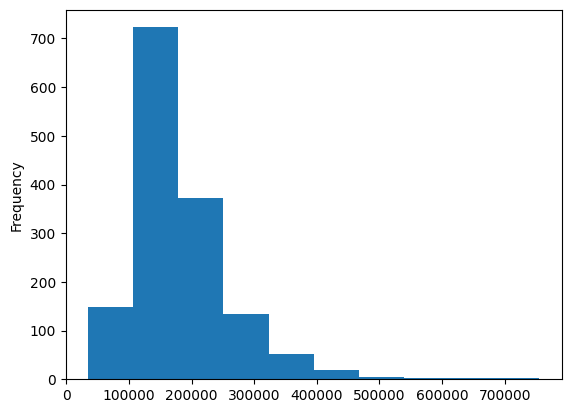

In [7]:
train['SalePrice'].plot.hist()

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 5/ Partition into y and X

In [9]:
selected_features = ['LotArea','OverallQual']

In [10]:
# Train
y = train['SalePrice']
X = train[selected_features]

In [11]:
# Test
X_test = test[selected_features]

# 6/ Validation - TTS

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(1168, 2)
(292, 2)
(1168,)
(292,)


# 7/ Preprocessing
- Numerical
- Categorial

## Numerical Transformation
- Convert all to StandardScaler

In [14]:
# 1 - Import Package
# from sklearn.preprocessing import StandardScaler

# 2 - Create an Instance
num_scaler = StandardScaler()

# 3 - Fit an Instance
num_scaler.fit(X_train)

# 4 - Transform
X_train = num_scaler.transform(X_train)
X_val = num_scaler.transform(X_val)
X_test = num_scaler.transform(X_test)

# 8/ Model

In [15]:
# 1 - Import Package
from sklearn.linear_model import LinearRegression

# 2 - Create an Instance
model = LinearRegression()

# 3 - Fit an Instance
model.fit(X_train, y_train)

# 4 - Predict/Check
print(model.coef_)
print(model.intercept_)

[14516.75846008 59186.79797588]
181441.5419520548


# 9/ Predict

In [16]:
y_train_prediction = model.predict(X_train)
y_val_prediction = model.predict(X_val)
y_test_prediction = model.predict(X_test)

# 10/ Evaluation Metrics
- RSq
- RMSE
- MSE

In [17]:
from sklearn.metrics import mean_squared_error

print('train metrics')
print('MSE :', mean_squared_error(y_train, y_train_prediction))
print('RMSE :',mean_squared_error(y_train, y_train_prediction, squared = False))

print('val metrics')
print('MSE :',mean_squared_error(y_val, y_val_prediction))
print('RMSE :',mean_squared_error(y_val, y_val_prediction, squared = False))

train metrics
MSE : 2075308625.3817189
RMSE : 45555.55537343079
val metrics
MSE : 2487414931.371689
RMSE : 49873.99052985122


/Users/hugolin/Developer/ai/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/hugolin/Developer/ai/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
